# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


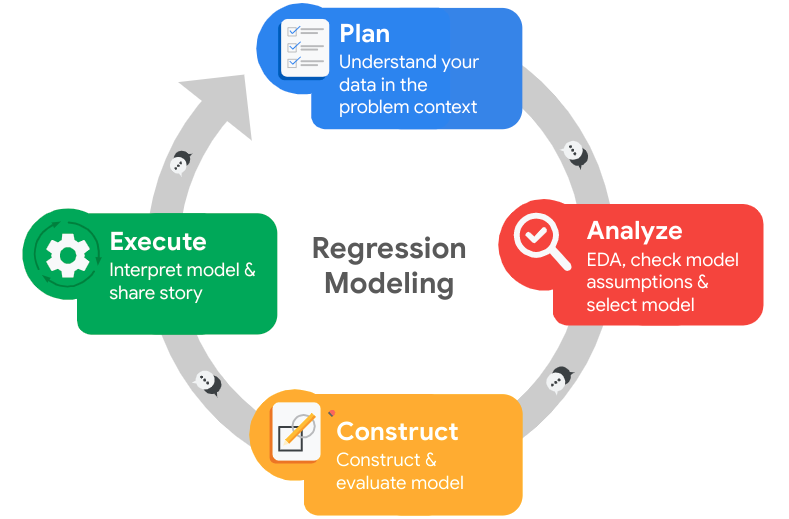

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- Key stakeholders for this project are members of the HR department at Salifort Motors who want to use this model to predict employee churn rates.

- This model will use variables from the provided dataset to generate potential insights as to which of those variables may be most predictive in anticipating employee churn.

- At first glance the `left` variable will be the output with the other 9 variables acting as potentially predictive contributors. Each of those variables seems relevant to a potential model.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# display all columns in dataframes
pd.set_option('display.max_columns', None)

# data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics and general helpfulness
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                         'average_montly_hours': 'average_monthly_hours',
                         'time_spend_company': 'tenure',
                         'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

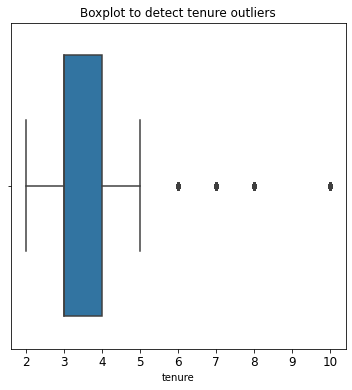

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect tenure outliers', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
# 25th percentile value, or lower value in boxplot
percentile25 = df1['tenure'].quantile(0.25)

# 75th percentile value, or upper value in boxplot
percentile75 = df1['tenure'].quantile(0.75)

# interquartile range of boxplot
iqr = percentile75 - percentile25

# define upper and lower limits for non-outlier values in 'tenure' variable
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('Lower limit:', lower_limit)
print('Upper limit:', upper_limit)

# identify subset containing outlier values
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# count of 'tenure' outlier values
print('Number of rows in data containing `tenure` outliers:', len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in data containing `tenure` outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- The mean value for  the `left` variable was less than 0.25, suggesting that 3 in 4 employees churn at some point. However, the minimum value for `tenure` in the dataset is 2 years, with a mean of roughly 3.5 years. There is also a very low rate of promotion within Salifort Motors, with a mean value of 0.02.

- An interesting point in the data arises with the `satisfaction_level` and `last_evaluation` variables, which are both ratings of employee performance. `last_evaluation`, performed by somebody other than the individual employee, is on average higher than `satisfaction_level` and has a lower standard deviation for this attribute. It may be more worthwhile to investigate differences in `satisfaction_level` values being provided by self-rating employees.

- For the sake of consistency, several variables were transformed to use snake_case naming and be more uniform with the other variables. The data was also transformed by removing rows with missing values, as well as those with high, outlier `tenure` values. Removing these outliers will allow the data to focus more on employees with lower tenure, and therefore more susceptible to factors inducing employee churn.

- In this project, EDA was used to make variable names more uniform for future use and establish avenues of investigation through the `describe` function. This provided broad information on relationships among the provided variables, and helped narrow the scope of helpful data.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

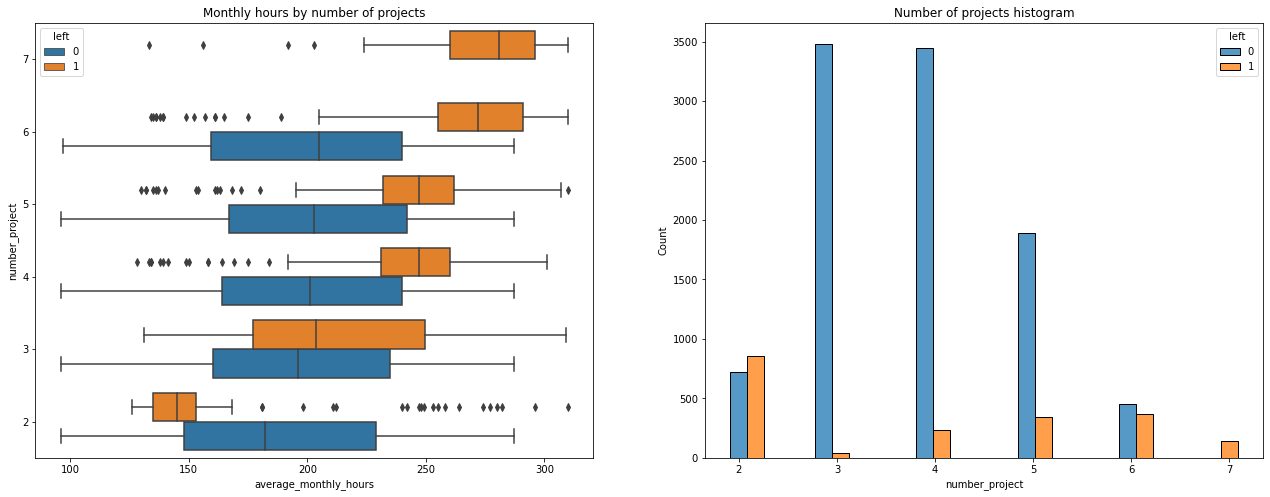

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
# set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# boxplot using `average_monthly_hours` distributions for `number_project`, coded by `left` status
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='12')

# histogram for distribution of `number_project`, comparing employee `left` status
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='12')

plt.show()

In [15]:
# confirm that all employees with `number_project` of 7 have churned
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

A box plot comparing the number of hours worked and the number of projects being worked on between employees who have churned and those have stayed will create a useful visualization for better understanding if an employee's workload potentially contributed to leaving the company. The accompanying histogram demonstrates a broader view of the same idea, instead using `number_project` and `left` to examine a similar relationship.

Mean values of `average_monthly_hours` are observed to increase with `number_project`, which would be expected. However, there are noticeable trends in the boxplot, with churning employees having observably higher or lower than average `average_monthly_hours`, which suggests a behavioral component to the churn. 

The boxplot and histogram also demonstrate that every employee with 7 `number_project` did churn, with the group having the greatest `average_monthly_hours` of all. Employees with 3 or 4 `number_project` have the lowest ratio of churning employees, suggesting this is an appropriate amount.

Compared to conventional thinking of 40 hour work weeks with 2 weeks of vacation time per year, `average_monthly_hours` values for all values of `number_project` are greater than the estimated 166.67 hours per month, except those employees who have left with only 2 `number_project`. This does suggest a large amount of workers are being overworked, and has effects leading to increased employee churn.

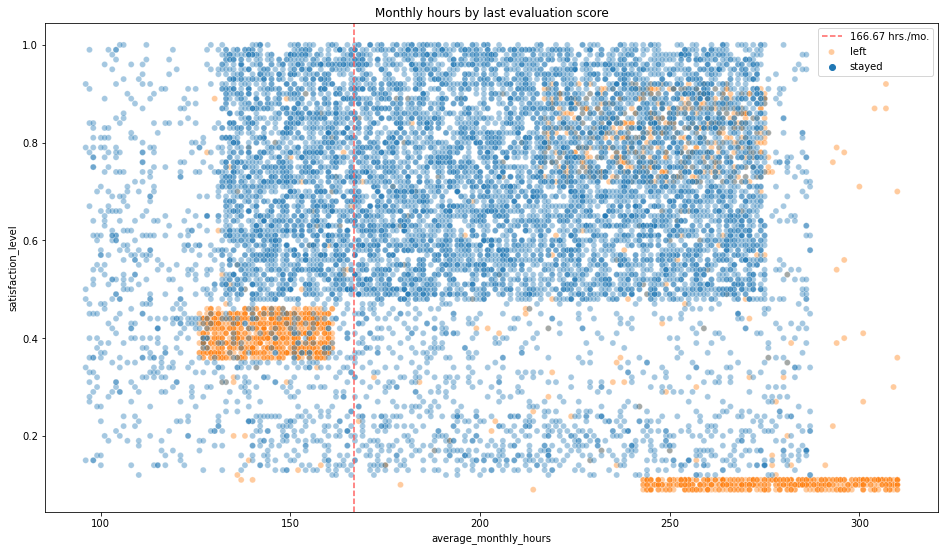

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
# scatterplot of `aerage_monthly_hours` and `satisfaction_level`, coded by `left` status
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='12');

The above scatterplot demonstrates the large portion of employees working greater than the conventional 166.67 hrs./mo., with a sizeable portion of them working greater than 225 hrs./mo. There is a significant number of churning employees with high `average_monthly_hours` and low satisfaction scores, likely being related.

There is another noticable group of churned employees with `satisfaction_level` around 0.4 and `average_monthly_hours` below 166.67 hrs./mo. The density of this group is interesting, with the lower amount of working hours potentially leading to lowered satisfaction from social dynamics with other employees at the company.

The third observable group of churned employees is less dense than the others, but have higher `satisfaction_level` values than the other two groups while still having a higher than normal `average_monthly_hours`.

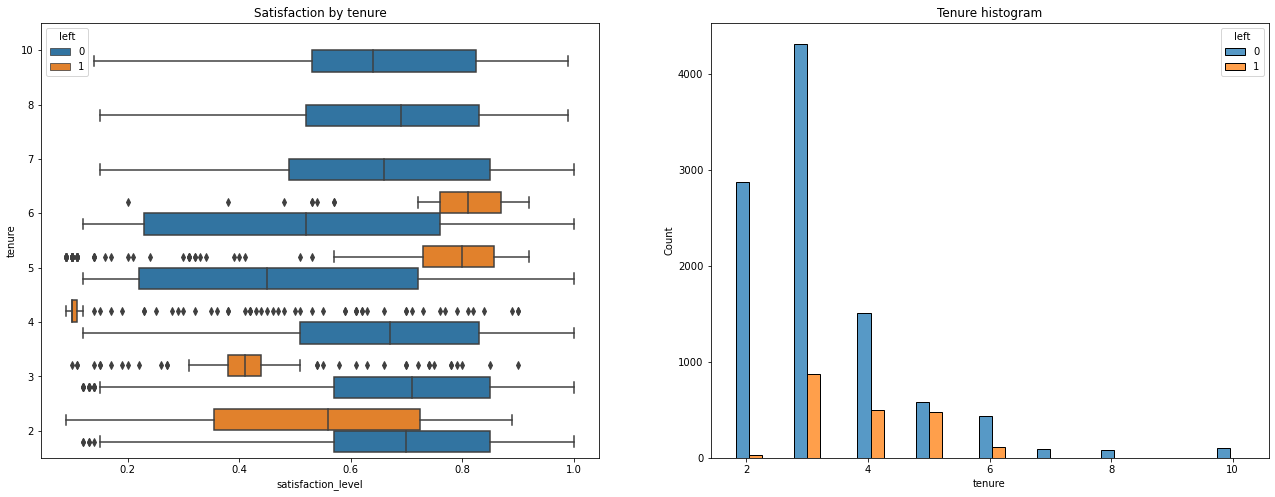

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
# set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# boxplot for distributions of `satisfaction_level` by `tenure`, coded by employee `left` status
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='12')

# histogram for distribution of `tenure`, coded by employee `left` status
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='12')

plt.show();

Employee `satisfaction_level` values demonstrate a generally slow decline with increasing `tenure`, but those employees with `tenure` of 4, and especially 5 and 6 years, are lower than would be expected by this trend. Investigating the root causes of this trend may be worthwhile.

From the boxplot, there are two general groupings of churned employees based on tenure - those with shorter tenure (2-4 years) and lower satisfaction levels, and those with medium-length tenure (5 or 6 years) and higher satisfaction scores. Leaving employees with 4 years of tenure have an especially low `satisfaction_level` value.

Employees with 7 or more years of tenure did not leave the company, with satisfaction levels resembling those employees with 2-4 years of tenure. However, the histogram shows that these employees are significantly smaller in quantity than employees with lower tenure lengths.

In [18]:
# mean and median `satisfaction_level` for employees based on `left` status
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Following expectations, employees who left have a lower mean and median `satisfaction_level` than employees who have stayed. While the median value is lower than the mean for churned employees, the median is greater than the mean for employees still with the company, which would present as a slight left-skew in a histogram for `satisfaction_level`.

Text(0.5, 1.0, 'Salary histogram by tenure: long-tenured employees')

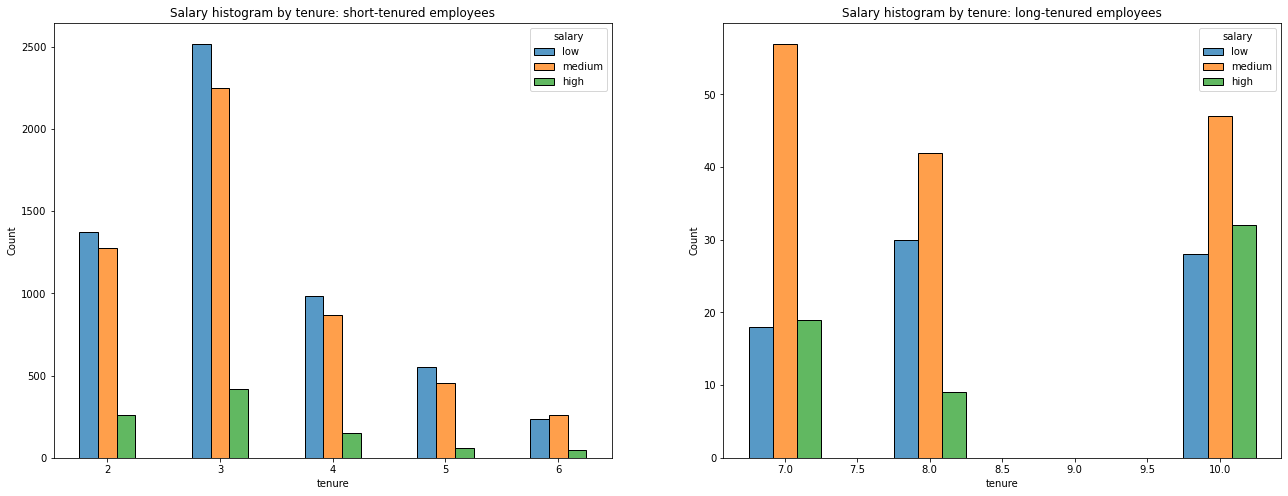

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
# set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# define employee tenure
tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]

# short-tenure histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured employees', fontsize='12')

# long-tenure histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured employees', fontsize='12')

The short-tenure histogram demonstrates that those employees with shorter tenures do not commonly reach high-salaries. While proportions of high-salary employees is greater for long-tenure employees, it is not a disproportionate amount.

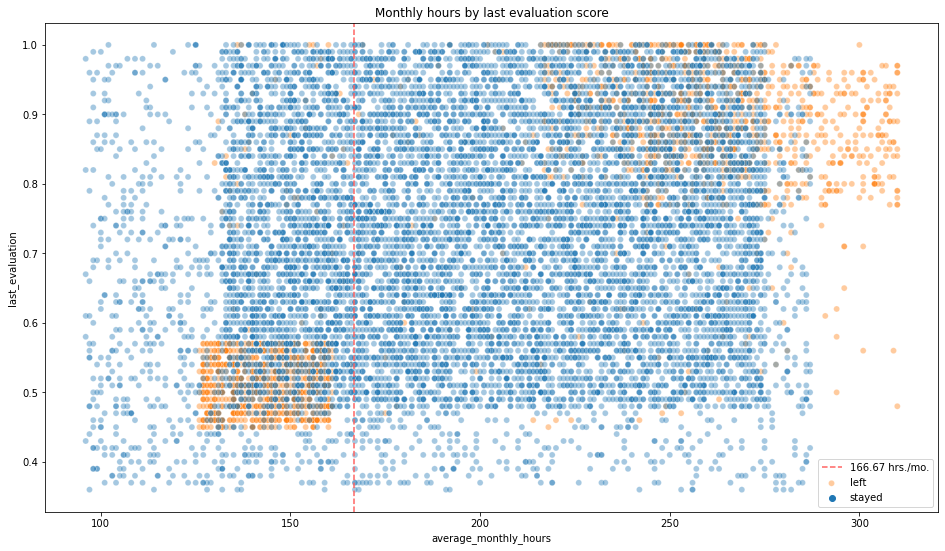

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
# scatterplot for `average_monthly_hours` and `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='12');

Two prominent groupings of employees who have left emerge from this scatterplot. One group has `average_monthly_hours` below the expected nominal monthly average of 166.67 hrs./mo. and have lower evaluation scores. The second group has higher evaluation scores and work greater than 200 hrs./mo. This trend suggests a relationship between worked hours and evaluation scores.

A majority of the data points are to the right of the vertical line representing 166.67 hrs./mo. for worked hours. A majority of employees are working more hours than this expected amount.

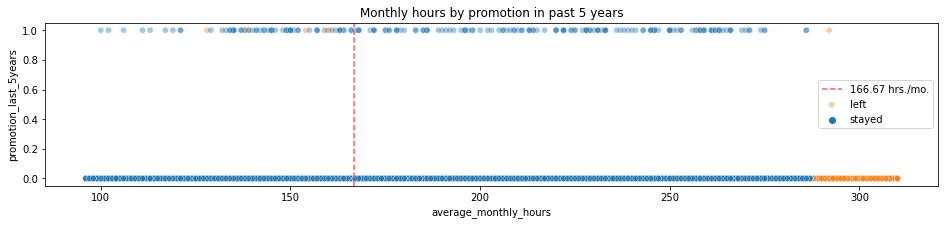

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
# plot examining `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion in past 5 years', fontsize='12');

From this visualization, it appears that very few employees who were promoted in the past 5 years left the company. Interestingly, employees who were not promoted and had high average monthly work hours all left the company.
None of the employees with a high amount of average monthly work hours were promoted in the past 5 years.

In [22]:
# employee counts by department
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

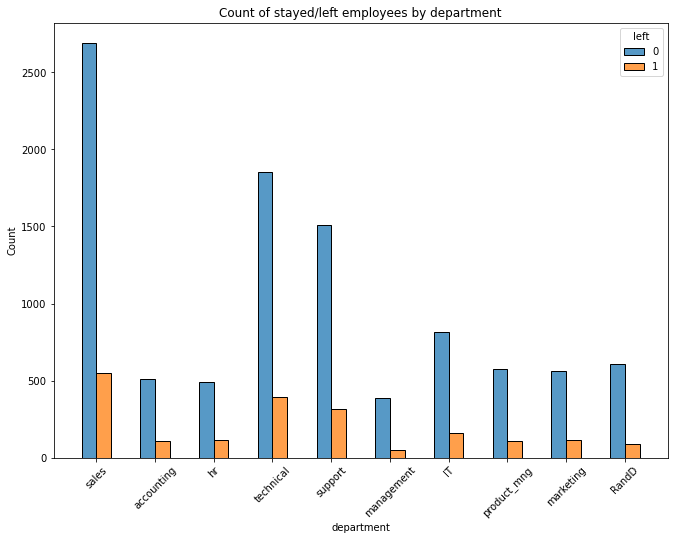

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
# stacked histogram comparing department distribution, coded by `left` status
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Count of stayed/left employees by department', fontsize='12');

It is not apparent that any of the company's departments have an overwhelming proportion of employees who have left.

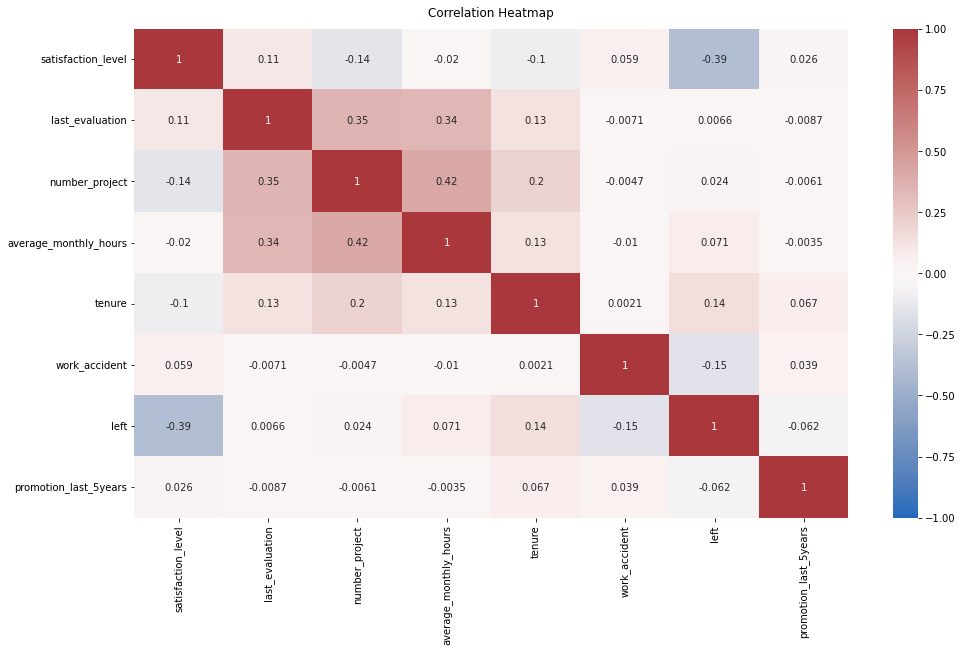

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
# correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The heatmap presents the number of projects an employee is working on, monthly hours worked, and evaluation scores as having the greatest correlation among the variables in the data. The least correlated variables are employee satisfaction level and whether they left the company or not.

### Insights

The implications of the data are that employees at Salifort Motors are being comparatively overworked, seen through the distribution of average monthly hours worked by employees, while also feeling they are being under-rewarded, as suggested by the scatterplot of promoted employees.

Employees leaving the company were also tied to their satisfaction level with a negative correlation, suggesting that employees with lower satisfaction levels are more likely to leave.

Notably, employees with 7 or more years at the company were not observed to leave, although the root reasons for this are currently unknown.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Predicting whether an employee will leave Salifort Motors or not is a categorical outcome variable, and therefore a classification task. With only two possible outcomes this is a binary classification task, signified by a `left` value of 0 signifying not leaving the company and 1 representing leaving.

### Identify the types of models most appropriate for this task.

Categorical predictions can be achieved through either logistic regression or tree-based learning models.

To demonstrate the applications of both model types, an instance of each model will be constructed in this project to be able to be compared.

### Modeling: Logistic Regression Model

This section covers the Salifort Motors project using a logistic regression model.

With binary classification being used for the `left` variable in this project, binomial logistic regression will be used.

Two variables have non-numeric data types and will be encoded, `department` and `salary`. These two both originally have `object`data types. `department` is categorical information and can use dummies for modeling. `salary` is on an ordinal scale, and should use encoding to still represent the hierarchical nature of the values.

In [25]:
### YOUR CODE HERE ###
# copy dataframe for encoding
df_enc = df1.copy()

# encoding `salary` as ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# dummy encoding for `department`
df_enc = pd.get_dummies(df_enc, drop_first=False)

# check for encoding in new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


With variables now encoded, a heatmap can be used to check correlation between variables to find and examine potential relationships.

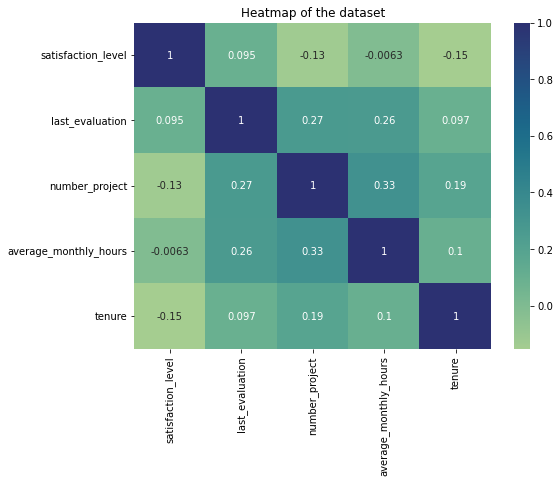

In [26]:
# heatmap to visualize correlation between variables
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
           .corr(), annot=True, cmap='crest')
plt.title('Heatmap of the dataset')
plt.show()

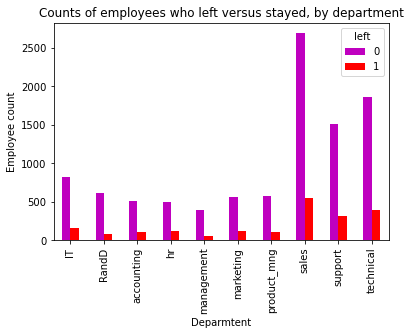

In [27]:
# stacked bar plot to visualize employees by department and whether they left or not
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed, by department')
plt.ylabel('Employee count')
plt.xlabel('Deparmtent')
plt.show()

In [28]:
# create new dataframe to remove `tenure` column outliers identified earlier due to logistic regression sensitivity
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
# isolate outcome variable, `left`, for goals of model prediction
y = df_logreg['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [30]:
# select model features for use as X data
X = df_logreg.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
# split X and y data into training and testing sets
# stratify based on `y` values due to class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [32]:
# construct logistic regression model and fit it to training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [33]:
# test logistic regression model, making predictions on test set
y_pred = log_clf.predict(X_test)

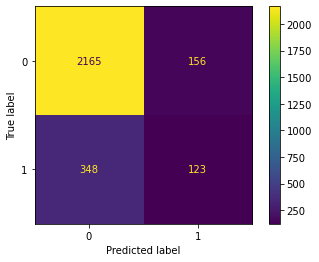

In [34]:
# confusion matrix to visualize results of model
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# dispaly of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                 display_labels=log_clf.classes_)

# plot confusion matrix
log_disp.plot(values_format='')

plt.show()

Understanding the confusion matrix:
    
The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

To understand these results a classification report can be created to evaluate precision, recall, f1-score, and accuracy metrics of this model.

The distribution of `left` values for the model should also be considered because of the use of binary classification, and can influence interpretation of the model metrics.

In [35]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is roughly an 83%-17% split between employees who have stayed and employees who have left. While not an even split, these data are not too imbalanced for use here (which would potentially involve resampling data). The usability of data in this case allows for the continuation of model evaluation.

In [36]:
# classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report for the logistic regression model shows a precision score of 79%, a recall score of 82%, an f1-score of 80% (based on weighted averages), and accuracy of 82%. Notably, the model does not have very high scores when predicted if an employee would leave, which would require further consideration if that is an important factor for the model's implementation.

### Modeling: Tree-Based Learning Model

This section covers the Salifort Motors project using a tree-based learning model.

In [37]:
# isolate the outcome variable, `left`
y = df_enc['left']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [38]:
# features are selected for the model, excluding the `left` variable
X = df_enc.drop('left', axis=1)

X. head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
# data is split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision tree - round 1

Initial decision tree model will be constructed, and cross-validated grid-search will be used to search for best model parameters.

In [40]:
# instantiate model
tree = DecisionTreeClassifier(random_state=0)

# assign dictionary of parameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
            'min_samples_leaf': [2, 5, 1],
            'min_samples_split': [2, 4, 6]
            }

# assign dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [41]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.82 s, sys: 20.2 ms, total: 2.84 s
Wall time: 2.84 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [42]:
# check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [43]:
# check best AUC score on CV
tree1.best_score_

0.969819392792457

0.9698 is a strong AUC score, suggesting the tree-based model is able to predict employees who will leave the company quite well.

In [44]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [45]:
# get all CV scores using `make_results` function
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


To check against the tendency of decision trees to become overfit, a random forest model could be investigated in addition to the other models.

#### Random forest model - round 1

In [46]:
# instantiate model
rf = RandomForestClassifier(random_state=0)

# assign dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, None],
            'max_features': [1.0],
            'max_samples': [0.7, 1.0],
            'min_samples_leaf': [1,2,3],
            'min_samples_split': [2,3,4],
            'n_estimators': [300, 500],
            }

# assign dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [47]:
# fit random forest model to training data
%time
rf1.fit(X_train, y_train)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 8.58 µs


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [48]:
# define path for saving model for future use
path = '/home/jovyan/work'

In [49]:
# define functions to pickle the model and read in the model
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [50]:
# use functions to save the model in a pickle file and read it in
# write pickle
write_pickle(path, rf1, 'hr_rf1')

# read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [51]:
# check best AUC score on CV
rf1.best_score_

0.9804250949807172

In [52]:
# check best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [53]:
# gather evaluation scores on the training set for both decision tree and random forest models
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


Apart from a marginally lower precision metric score, the random forest model scores are greater than the decision tree model. The difference of 0.001 between the precision scores is quite low and negligible. Greater metric scores for the random forest model indicate that it outperforms the decision tree, and be used going forward.

Next steps will be to evaluate the model using the test set.

In [54]:
# function to get all scores from a model's predictions
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [55]:
# use best-performing model to predict on the test dataset
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


The evaluation metrics obtained from using test data are quite similar to those of the training data, being a good indicator that the model is strong. Because the test data was only used to train a single model, there should also be greater confidence in the model's ability to predict on new and previously unseen data.

#### Feature Engineering

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

You could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

In [56]:
# drop `satisfaction_level` from dataframe and save as a new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [57]:
# create the `overworked` column
df2['overworked'] = df2['average_monthly_hours']

# inspect `overworked` values for min and max values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


At a rate of working 50 hours per year, 5 days per week, 8 hours per day, it is expected for 166.67 hours per month to be the average number of hours worked. In other words, it may be a point of interest to define working 175 hours or more on average as being overworked.

To make the `overworked` column binary, it could be reassigned using a boolean mask.

In [58]:
# define `overworked` as working > 175 hrs./mo.
df2['overworked'] = (df2['overworked'] > 175).astype(int)

df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [59]:
# drop `average_monthly_hours` column, having been functionally replaced by `overworked` column
df2 = df2.drop('average_monthly_hours', axis=1)

df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [60]:
# isolate the outcome variable, `left`
y = df2['left']

# select features, all non-`left` columns
X = df2.drop('left', axis=1)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - round 2

In [61]:
# instantiate model
tree = DecisionTreeClassifier(random_state=0)

# assign dictionary of hyperparameters to search over
cv_params = {'max_depth': [4, 6, 8, None],
            'min_samples_leaf': [1, 2, 5],
            'min_samples_split': [2, 4, 6]
            }

# assign dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# instantiate GridSearch
tree2= GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [62]:
%time
tree2.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                

In [63]:
# check best parameters
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [64]:
# check best AUC score on CV
tree2.best_score_

0.9586752505340426

Even without the `satisfaction_level` and `average_monthly_hours` data this model is able to perform very well, based on the AUC score.

In [65]:
# get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


The scores of a model utilizing fewer features than the original model scores lower in comparison. However, even though the round 2 model scores are lower they are still quite good.

#### Random forest - round 2

In [66]:
# instantiate model
rf = RandomForestClassifier(random_state=0)

# assign dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5,None],
            'max_features': [1.0],
            'max_samples': [0.7, 1.0],
            'min_samples_leaf': [1, 2, 3],
            'min_samples_split': [2, 3, 4],
            'n_estimators': [300, 500],
            }

# assign dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [67]:
%time
rf2.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [68]:
# write and read pickle
write_pickle(path, rf2, 'hr_rf2')
rf2 = read_pickle(path, 'hr_rf2')

# check best parameters
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [69]:
# check best AUC score on CV
rf2.best_score_

0.9648100662833985

In [70]:
# get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


In the round 2 models there are very small differences in scoring metrics between the decision tree and random forest models. The random forest model does perform better when AUC is regarded as the deciding metric.

In [71]:
# get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


Scoring metrics here indicate a well-performing, final model.

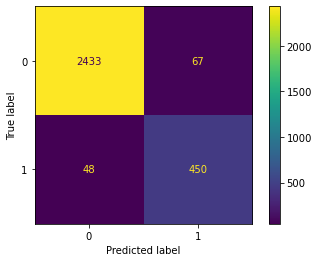

In [72]:
# array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The confusion matrix ends up predicting a slightly higher amount of false positives (67) than false negatives (48) which will lead to additional employees being predicted to leave the company when they are actually not. However, the model is still strong, with far greater amounts of accurate predictions being made.

For better understanding of the models, examining the splits of the decision tree model and most important features from the random forest model.

#### Decision tree splits

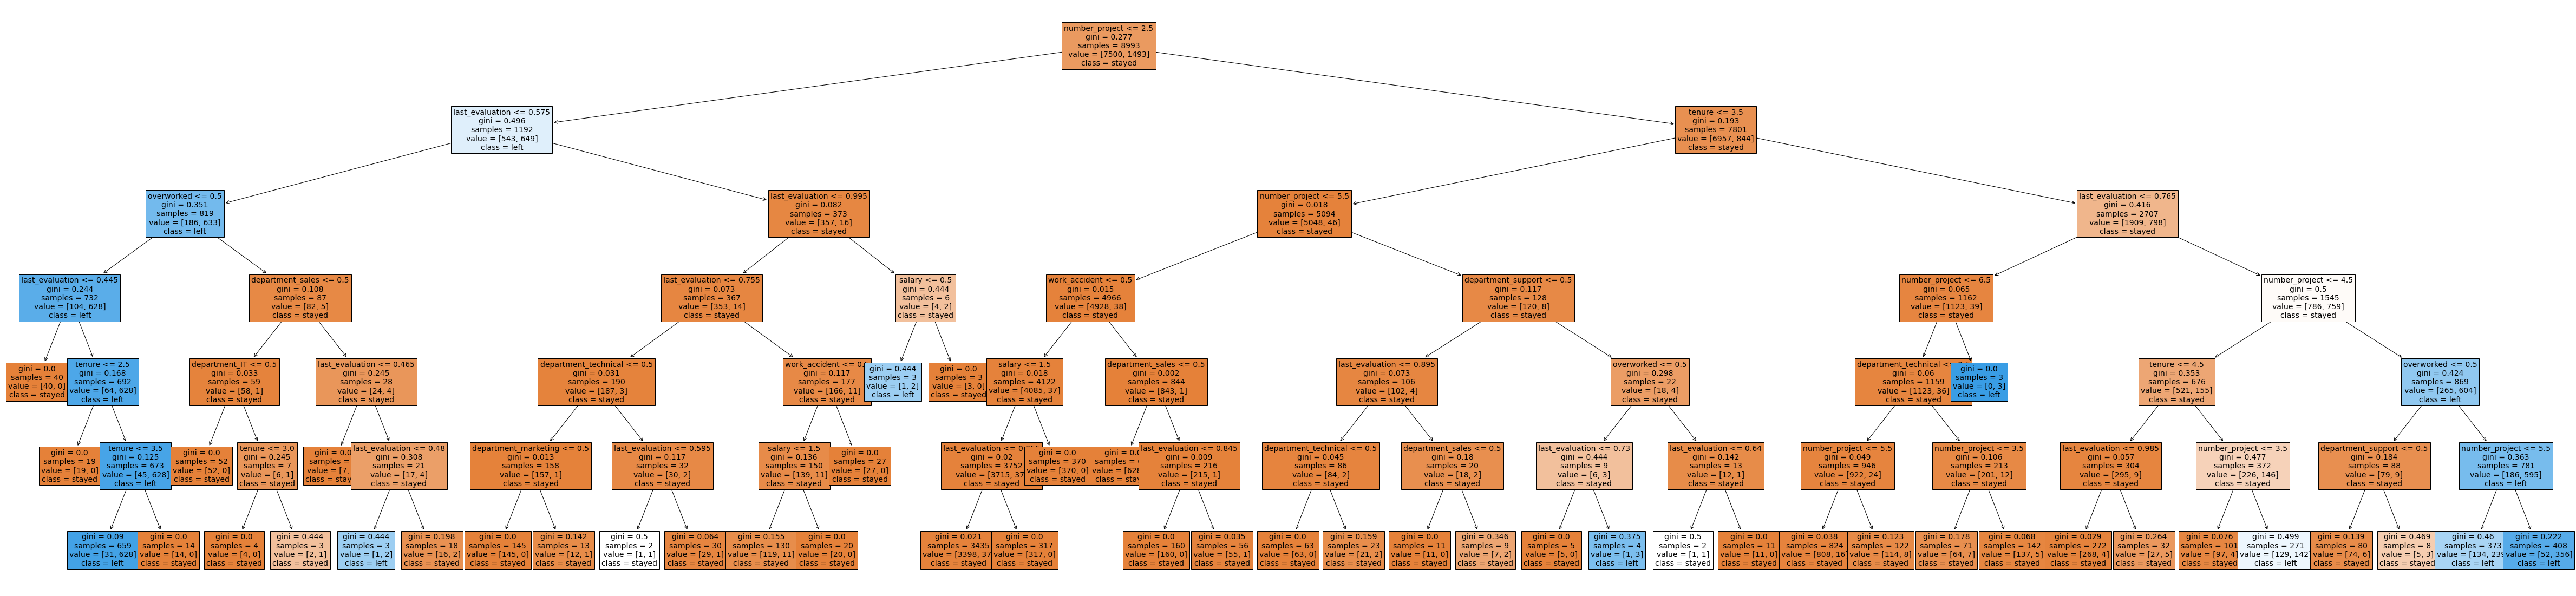

In [73]:
# ploting decision tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [74]:
# decision tree feature importance
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                columns=['gini_importance'],
                                index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# only extracting features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


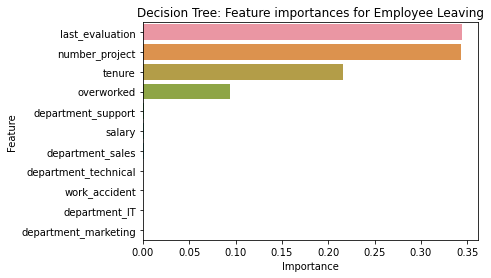

In [75]:
# barplot to visualize most important decision tree feature importances
sns.barplot(data=tree2_importances, x='gini_importance', y=tree2_importances.index, orient='h')
plt.title('Decision Tree: Feature importances for Employee Leaving', fontsize=12)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

The barplot illustrates the most important features in the decision tree model being, in order, `last_evaluation`, `number_project`, `tenure`, and `overworked`. These variables will be the most helpful in making accurate predictions for `left`, while the influence of other variables will be negligible in comparison.

#### Random forest feature importance

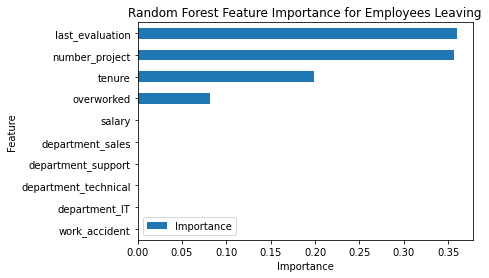

In [76]:
# feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# column labels of top 10 features
feat = X.columns[ind]

# filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({'Feature':feat,'Importance':feat_impt})
y_sort_df = y_df.sort_values('Importance')
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x='Feature',y='Importance')

ax1.set_title('Random Forest Feature Importance for Employees Leaving', fontsize=12)
ax1.set_ylabel('Feature')
ax1.set_xlabel('Importance')

plt.show()

This plot for the most important features for the random forest model determines that those are `last_evaluation`, `number_project`, `tenure`, and `overworked` as the most crucial. These four features will be most useful in predicting the value of `left`. The remaining 6 features do not have a very noticeable importance value. Notably, these are the same 4 features with the greatest impact for the decision tree model, as well.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

#### Logistic Regression

The final model for a logistic regression approach achieved scoring metrics of 79% for precision, 82% for recall, an f1-score of 80% (based on weighted averages), and accuracy of 82% when used with the test data. 

#### Tree-based Machine Learning

Random forest models produced greater AUC scores and comparable scoring metrics to decision tree models both before and after feature engineering. When the test data was used, a random forest model using feature engineering produced an AUC score of 93.8%, precision score of 87%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%.

### Conclusion, Recommendations, Next Steps

The models and ranking of feature importances establish the idea that employees at Salifort Motors are being overworked, which goes on to directly influence employee churn at the company.

To better retain employees, the following recommendations can be made to stakeholders:

- Based on feature importance of `number_project`, limit the number of projects an employee is able to work on at one time.
- A large portion of employees with high `average_monthly_hours` that were not promoted in the last 5 years did end up leaving the company. Company policies regarding promotions should be evaluated and potentially changed to increase internal promotions.
- There was a noticeable drop in average `satisfaction_level` for employees with 5 or 6 years of `tenure`. Further investigation may be needed to identify the root causes of this drop.
- A large portion of employees work a greater-than-expected amount of monthly hours and is a factor influencing employee churn. A cap should be in place to strictly limit employees from overworking, or rewarded with additional benefits to prevent harm to company culture. Employees will need to be informed about these policies, in addition to have a system of enforcing these measures.
- To address current employees predicted to leave, the company should take action to create a more open and inclusive work culture which supports individual employees. Employees may have developed feelings of being devalued, so mechanisms need to be put into place to address these factors and reinforce that they are changing.
- The `last_evaluation` attribute was the number 1 ranked important feature. Methods and factors influencing employee evaluation scores should be examined for their current relevance to company culture. It may be worth shifting reward benchmarks for employee evaluations down. This would reward a broader group of employees, and a different reward structure could be implemented for those exceeding this new reward threshold structure.

#### Next Steps

Employee evaluation scores as a potential source of data leakage could be addressed in further studies. The influence of potential data leakage could be limited by removing `last_evaluation` data from future studies, in addition to examining the intervals and processes used when they are carried out. Irregular or long intervals between evaluation periods may support the notion that this data is not crucial to actually predicting employee churn, while the opposite may reinforce the role of employee evaluation as a highly-ranked feature in the model.

An additional, alternate approach to this topic could use a K-means model to sort the data into clusters, and use them to generate potential insights for addressing the issues of Salifort Motors.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.